In [1]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

# Manufacture

In [14]:
manu = pd.ExcelFile("../../Data/cleaned/Manufacturing_filled.xlsx")
service = pd.ExcelFile("../../Data/cleaned/Service_filled.xlsx")
manu_name = manu.sheet_names
ser_name = service.sheet_names

In [15]:
dic_country = \
{'AUS': 'Australia',
 'BRA': 'Brazil',
 'CAN': 'India',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'IND': 'India',
 'JPN': 'Japan',
 'SGP': 'Singapore',
 'USA': 'United States'}
Country_code = dic_country.keys()

In [16]:
method_dict = {"Mean": [], "Median": [], "LOCF": [], "NOCB" :[],"Rolling":[], "Interpolate":[]}
for name in manu_name:
    country = name.split(" ")[0]
    method = name.split(" ")[1]
    df = pd.read_excel("../../Data/cleaned/Manufacturing_filled.xlsx", sheet_name = name)
    method_dict[method].append(df)

## India

Time range: 1980-2021

In [17]:
df = method_dict["NOCB"][3]
df

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,19.770000,30.150803,0.56324,437.826904,59.390147,104.113349,0.029820,4.737000e+09,120.900002,4.100000e+07,1304950.0,9.186189e+10,194.804722,1.236532e+11,14.7,3.579166,31.975070
1,1981,19.770000,30.150803,0.56324,437.826904,60.385728,105.455570,0.135296,4.737000e+09,155.399994,4.100000e+07,1304950.0,9.004046e+10,197.071474,1.300873e+11,14.7,3.579166,31.975070
2,1982,19.770000,30.150803,0.56324,437.826904,61.344172,107.020193,0.209664,4.737000e+09,184.199997,4.100000e+07,1304950.0,9.151227e+10,203.334920,1.365207e+11,14.7,3.579166,31.975070
3,1983,19.770000,30.150803,0.56324,437.826904,62.274574,108.577807,0.275699,2.475000e+09,216.000000,4.100000e+07,1304950.0,1.020296e+11,225.431929,1.556016e+11,14.7,3.579166,31.975070
4,1984,19.770000,30.150803,0.56324,437.826904,63.158799,110.011809,0.483946,-3.200000e+07,302.000000,4.100000e+07,1304950.0,1.115976e+11,250.713969,1.709516e+11,14.7,3.579166,31.975070
5,1985,19.770000,30.150803,0.56324,437.826904,63.953825,111.520085,0.536047,-1.259200e+10,403.000000,4.100000e+07,1304950.0,1.321895e+11,294.458849,2.013865e+11,14.7,3.579166,31.975070
6,1986,19.770000,30.150803,0.56324,437.826904,64.472159,113.191231,0.623425,-7.589000e+09,467.500000,4.100000e+07,1304950.0,1.308732e+11,281.928121,1.950963e+11,14.7,3.579166,31.975070
7,1987,19.770000,30.150803,0.56324,437.826904,64.886253,115.021003,0.847703,2.910000e+08,647.500000,4.100000e+07,1304950.0,1.182474e+11,251.811957,1.713794e+11,14.7,3.579166,31.975070
8,1988,19.770000,30.150803,0.56324,437.826904,65.204299,116.887912,1.022559,-4.060000e+09,731.799988,4.100000e+07,1304950.0,1.359505e+11,283.537695,1.940199e+11,14.7,3.579166,31.975070
9,1989,19.770000,30.150803,0.56324,437.826904,65.483490,118.693811,0.975650,-4.927000e+09,683.099976,4.100000e+07,1304950.0,1.477876e+11,310.881912,2.235563e+11,14.7,3.579166,31.975070


### Missing value imputation

Using NOCB together with LOCF

In [18]:
# using last/next point to fill missing 
cols = df.columns
for j in cols:
  for i in range(0, len(df)):
    if pd.isnull(df[j][i]):
      df[j][i] = df[j][i-1]

<ipython-input-18-1aa39e0cc651>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j][i-1]


In [19]:
df

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,19.770000,30.150803,0.56324,437.826904,59.390147,104.113349,0.029820,4.737000e+09,120.900002,4.100000e+07,1304950.0,9.186189e+10,194.804722,1.236532e+11,14.7,3.579166,31.975070
1,1981,19.770000,30.150803,0.56324,437.826904,60.385728,105.455570,0.135296,4.737000e+09,155.399994,4.100000e+07,1304950.0,9.004046e+10,197.071474,1.300873e+11,14.7,3.579166,31.975070
2,1982,19.770000,30.150803,0.56324,437.826904,61.344172,107.020193,0.209664,4.737000e+09,184.199997,4.100000e+07,1304950.0,9.151227e+10,203.334920,1.365207e+11,14.7,3.579166,31.975070
3,1983,19.770000,30.150803,0.56324,437.826904,62.274574,108.577807,0.275699,2.475000e+09,216.000000,4.100000e+07,1304950.0,1.020296e+11,225.431929,1.556016e+11,14.7,3.579166,31.975070
4,1984,19.770000,30.150803,0.56324,437.826904,63.158799,110.011809,0.483946,-3.200000e+07,302.000000,4.100000e+07,1304950.0,1.115976e+11,250.713969,1.709516e+11,14.7,3.579166,31.975070
5,1985,19.770000,30.150803,0.56324,437.826904,63.953825,111.520085,0.536047,-1.259200e+10,403.000000,4.100000e+07,1304950.0,1.321895e+11,294.458849,2.013865e+11,14.7,3.579166,31.975070
6,1986,19.770000,30.150803,0.56324,437.826904,64.472159,113.191231,0.623425,-7.589000e+09,467.500000,4.100000e+07,1304950.0,1.308732e+11,281.928121,1.950963e+11,14.7,3.579166,31.975070
7,1987,19.770000,30.150803,0.56324,437.826904,64.886253,115.021003,0.847703,2.910000e+08,647.500000,4.100000e+07,1304950.0,1.182474e+11,251.811957,1.713794e+11,14.7,3.579166,31.975070
8,1988,19.770000,30.150803,0.56324,437.826904,65.204299,116.887912,1.022559,-4.060000e+09,731.799988,4.100000e+07,1304950.0,1.359505e+11,283.537695,1.940199e+11,14.7,3.579166,31.975070
9,1989,19.770000,30.150803,0.56324,437.826904,65.483490,118.693811,0.975650,-4.927000e+09,683.099976,4.100000e+07,1304950.0,1.477876e+11,310.881912,2.235563e+11,14.7,3.579166,31.975070


In [20]:
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))

In [21]:
report(df)

<b>head():</b>

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,19.77,30.150803,0.56324,437.826904,59.390147,104.113349,0.029820,4.737000e+09,120.900002,41000000.0,1304950.0,9.186189e+10,194.804722,1.236532e+11,14.7,3.579166,31.97507
1,1981,19.77,30.150803,0.56324,437.826904,60.385728,105.455570,0.135296,4.737000e+09,155.399994,41000000.0,1304950.0,9.004046e+10,197.071474,1.300873e+11,14.7,3.579166,31.97507
2,1982,19.77,30.150803,0.56324,437.826904,61.344172,107.020193,0.209664,4.737000e+09,184.199997,41000000.0,1304950.0,9.151227e+10,203.334920,1.365207e+11,14.7,3.579166,31.97507
3,1983,19.77,30.150803,0.56324,437.826904,62.274574,108.577807,0.275699,2.475000e+09,216.000000,41000000.0,1304950.0,1.020296e+11,225.431929,1.556016e+11,14.7,3.579166,31.97507
4,1984,19.77,30.150803,0.56324,437.826904,63.158799,110.011809,0.483946,-3.200000e+07,302.000000,41000000.0,1304950.0,1.115976e+11,250.713969,1.709516e+11,14.7,3.579166,31.97507


<b>describe():</b>

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,4.200000e+01,4.200000e+01,42.000000,42.000000
mean,2000.500000,24.679524,30.399952,1.163925,741.885580,68.476649,131.344181,2.607034,1.075012e+11,7952.941410,9.417056e+07,1.883128e+06,1.730870e+12,3024.626816,2.193332e+12,1.470000e+01,4.503362,31.184865
std,12.267844,4.913986,0.576722,0.660053,368.406315,3.974797,13.964463,1.702667,1.307665e+11,8329.681006,7.211471e+07,6.702183e+05,2.049047e+12,3638.719111,2.678921e+12,3.595778e-15,1.880271,1.677081
min,1980.000000,19.770000,29.363657,0.563240,381.687683,59.390147,104.113349,0.029820,-1.259200e+10,120.900002,4.100000e+07,1.256010e+06,9.004046e+10,194.804722,1.236532e+11,1.470000e+01,3.579166,26.285189
25%,1990.250000,19.770000,30.150803,0.563240,437.826904,65.760123,120.861924,1.051629,4.802250e+09,866.099991,4.100000e+07,1.304950e+06,1.508158e+11,321.699041,2.316072e+11,1.470000e+01,3.579166,31.600384
50%,2000.500000,22.375000,30.150803,0.916745,555.144104,68.622566,134.460247,2.591025,3.660211e+10,4066.196000,4.286304e+07,1.423230e+06,5.757806e+11,1006.240363,7.997970e+11,1.470000e+01,3.579166,31.975070
75%,2010.750000,30.712500,30.377119,1.763685,1046.698761,72.193085,142.519378,3.745162,2.193503e+11,15932.488075,1.428284e+08,2.520595e+06,3.342844e+12,5348.377378,3.585193e+12,1.470000e+01,3.754434,31.975070
max,2021.000000,32.320000,32.123655,2.400930,1584.865112,73.265589,149.723553,6.186882,4.628079e+11,25394.587800,2.451038e+08,2.946579e+06,6.991844e+12,12556.333120,8.126755e+12,1.470000e+01,9.081590,32.452328


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Year                                                                                   42 non-null     int64  
 1   Employment_in_industry_male                                                            42 non-null     float64
 2   High_technology_exports                                                                42 non-null     float64
 3   Research_development_expenditure                                                       42 non-null     float64
 4   Researchers in R&D                                                                     42 non-null     float64
 5   Population_labor_rate                                                           

None

<b>infer_dtype():</b>

Year                                                                                      integer
Employment_in_industry_male                                                              floating
High_technology_exports                                                                  floating
Research_development_expenditure                                                         floating
Researchers in R&D                                                                       floating
Population_labor_rate                                                                    floating
Population_density                                                                       floating
Foreign_direct_investment                                                                floating
Net_trade_in_goods_services                                                              floating
Air_freight_million_ton_km                                                               floating
Container_port_traff

### Visualize time series

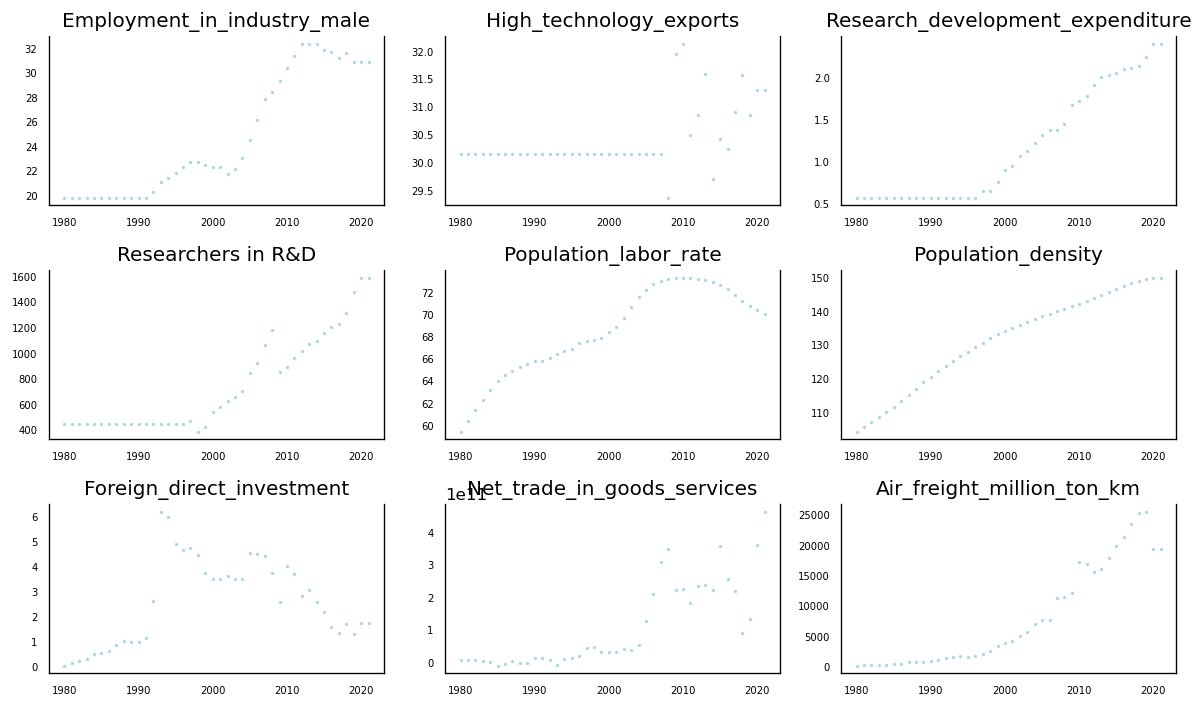

In [22]:
# Plot
def plot_time_series(df, nrow, ncol):
  fig, axes = plt.subplots(nrow, ncol, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      data = df[df.columns[i+1]]
      ax.plot(df[df.columns[0]],data, 'o', color = "lightblue",ms = 1)
      # Decorations
      ax.set_title(df.columns[i+1])
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)

  plt.tight_layout()
plot_time_series(df,3,3)

### ADF Test

In [23]:
df_test = df.drop(['Year'],axis = 1)

In [26]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Cannot reject Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [27]:
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Employment_in_industry_male" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8495
 No. Lags Chosen       = 1
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = 0.8042. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "High_technology_exports" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9843
 No. Lags Chosen       = 0
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.0015. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Research_development_expenditure" 
    -----------------------------------------------


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Adf test shows that only 'Container_port_traffic_TEU' is stationary. Therefore, try to difference once and check if it works. 

In [28]:
df_diff = df_test.diff().dropna()
# df_diff
df_diff_2 = df_diff.diff().dropna()
# df_diff_2

In [29]:
for name, column in df_diff_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Employment_in_industry_male" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5383
 No. Lags Chosen       = 0
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High_technology_exports" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2788
 No. Lags Chosen       = 9
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0005. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Research_development_expenditure" 
    -----------------------------------------------
 Null Hypothe

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


After second difference, the variable 'Logistic_performance' is still non-stationary. Therefore, we decide to proceed without using this feature and prepare data with second difference level.

### Cointegration Test

In [30]:
from statsmodels.tsa.stattools import coint

df_y = df_test['Manufacturing_value added_%_of_GDP']

col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns


for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))
  


Employment_in_industry_male: 
  coint_t -0.8460469556771454 
  p-value 0.9283777939065595
 true
High_technology_exports: 
  coint_t -1.3195899070021992 
  p-value 0.8237461956865295
 true
Research_development_expenditure: 
  coint_t -2.77765131037334 
  p-value 0.17289922721634693
 true
Researchers in R&D: 
  coint_t -2.1296592697948684 
  p-value 0.4608765800344822
 true
Population_labor_rate: 
  coint_t -0.7390192197576813 
  p-value 0.9422598355701735
 true
Population_density: 
  coint_t -1.2794087285771962 
  p-value 0.835862975173955
 true
Foreign_direct_investment: 
  coint_t -1.0973730312497096 
  p-value 0.8827693053807615
 true
Net_trade_in_goods_services: 
  coint_t -2.83839048045556 
  p-value 0.15377487573752024
 true
Air_freight_million_ton_km: 
  coint_t 0.41366779103009116 
  p-value 0.9920053283592412
 true
Container_port_traffic_TEU: 
  coint_t -0.46102793451114454 
  p-value 0.9669931843101546
 true
Railways_goods_trans_million_ton-km: 
  coint_t 1.388201377645598 
  

### VAR model fitting

In [31]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [59]:
diff2_var = df_diff_2 .drop(["Access_finance"], axis = 1)
def split_train_test(df, percentage = 0.8):
  train = df[:int(percentage*(len(df)))]
  valid = df[int(percentage*(len(df))):]
  return train, valid

train_diff2, valid_diff2 = split_train_test(diff2_var, 0.8)

In [60]:
valid_diff2

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
34,0.019997,-2.604627,-0.06115,-28.911377,-0.085590,-0.045619,-0.693427,-1.761500e+10,1283.8678,-4313800.0,-163051.0,-6.667949e+10,-103.945250,-3.313025e+10,2.098094,0.583006
35,-0.519999,2.605477,0.01001,38.636353,-0.103219,-0.065786,0.113590,1.506518e+11,214.2011,-2145000.0,-213220.0,-2.814384e+11,-235.463283,-8.292090e+10,-1.772175,-1.170210
36,0.330000,-0.905833,0.00874,-15.754272,-0.126674,-0.007412,-0.269488,-2.387052e+11,-484.0939,-4482700.0,381390.0,-7.566483e+10,-302.382902,-2.594619e+11,0.559489,0.562545
37,-0.289999,0.843901,-0.02762,-17.774414,-0.073653,0.052503,0.430030,6.340649e+10,520.0745,20191820.0,313190.0,5.311924e+11,644.691606,3.613510e+11,-1.878809,0.921723
38,0.889999,-0.004158,0.00885,54.244873,-0.030170,-0.199504,0.551282,-9.037756e+10,-86.4372,-13261040.0,-131110.0,1.488241e+11,365.731562,3.239646e+11,0.594815,-0.307420
39,-1.170000,-1.389274,0.07950,81.793457,0.036590,-0.165489,-0.727959,1.730439e+11,-1794.2117,-2217380.0,-185880.0,-6.127112e+11,-849.858908,-5.464864e+11,-0.607248,-0.798364
40,0.750000,1.174815,0.05225,-50.521362,0.075430,-0.172950,0.795652,1.827892e+11,-6268.7249,-5754619.0,0.0,5.214825e+10,26.335369,-2.219142e+11,0.946490,0.576757
41,0.000000,-0.445981,-0.15630,-113.611206,0.074877,-0.355979,-0.412465,-1.224930e+11,6130.3442,-3073781.0,0.0,1.385651e+12,1882.831803,-1.273376e+11,-0.430485,1.642074


In [61]:
# select the order of model
model = VAR(endog=train_diff2)
lag_order = model.select_order()
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      193.7*      194.4*  1.278e+84*      193.9*
-------------------------------------------------


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


From above order selection, we will choose the lag 2 model.

In [62]:
res = model.fit(2)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Oct, 2022
Time:                     20:28:49
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -174.562
Nobs:                     30.0000    HQIC:                  -191.334
Log likelihood:           2835.25    FPE:                2.22313e-81
AIC:                     -199.223    Det(Omega_mle):     1.55227e-86
--------------------------------------------------------------------
Results for equation Employment_in_industry_male
                                                                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                             

### Residual Checking for correlation 

Ljung-Box Test

Check the autocorrelation between residuals. As we can see, all residuals are remained within significant level, which indicates after model fitting there is no significant auto correlation left in residual.

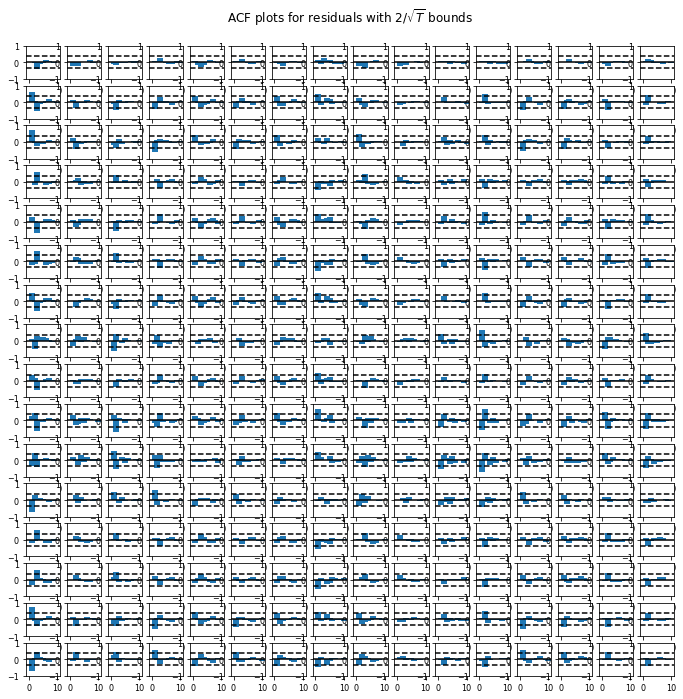

In [63]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction


In [64]:
index = pd.date_range(start = '2014', periods = 8, freq= "AS")
index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [65]:
pred = res.forecast(train_diff2.values, steps=8)
df_forecast = pd.DataFrame(data=pred, columns=train_diff2.columns,
                           index=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
df_forecast

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
2014,-6.499274,-4.352076,-1.826024,-1428.403323,0.895652,-4.071197,0.709702,-3.552542e+11,-10514.984946,-1.203365e+07,-1.154751e+06,-2.167911e+10,-451.834899,-4.290656e+11,-0.470687,0.192848
2015,9.144638,9.612459,3.892551,2089.290372,3.915741,3.115460,-40.547503,-5.439227e+11,7469.416252,-1.674941e+07,2.449946e+06,1.110379e+11,1091.852247,1.181935e+12,0.561689,-0.585282
2016,6.846652,-13.881895,-5.537004,-3075.372628,1.434688,0.156462,115.144234,1.116152e+12,-8645.493226,-3.315627e+07,-4.166931e+06,-1.407148e+12,-4002.049152,-3.042336e+12,-0.675611,1.126485
2017,-24.647510,6.619471,5.105452,2543.537727,-13.839443,5.399398,-183.079268,-1.244915e+11,-7281.709018,-7.392579e+07,3.235404e+06,-1.040124e+12,183.259042,1.017514e+12,1.317109,2.282779
2018,1.537396,-2.143497,-2.945676,-700.936325,11.318064,-4.797440,83.894146,6.560345e+11,4109.892422,6.211993e+07,-4.339441e+06,5.615834e+11,14.318715,-3.386012e+11,-2.381652,-2.163787
2019,24.435257,-0.684190,1.681819,1848.453706,-8.070777,4.957847,-4.467375,-2.169979e+12,2637.652348,-1.000863e+08,5.957694e+06,-1.711280e+12,-2139.478120,-1.126600e+12,3.039246,1.351394
2020,-65.877701,-11.069915,-2.818640,-4073.777079,20.386224,-11.493357,45.026041,3.818577e+12,-4375.593801,1.304637e+08,-8.878381e+06,-2.287913e+12,-4959.742477,-4.321247e+12,-4.919210,-1.823713
2021,58.366117,51.361630,13.847758,7852.036757,-43.569697,21.962170,-221.339919,-5.766385e+12,12950.434622,-4.796941e+08,1.455555e+07,-1.683267e+11,3135.249448,3.463159e+12,4.762202,1.643552


In [66]:
#invert result
test_obs = 8
def invert_second_diff(col_name, test_obs):
  df_forecast[col_name+"_1d"] = df[col_name].iloc[-test_obs-1] - df[col_name].iloc[-test_obs-2] +df_forecast[col_name].cumsum()
  df_forecast[col_name+"_forecasted"] = df[col_name].iloc[-test_obs-1] + df_forecast[col_name+"_1d"].cumsum()

# df_forecast['y_1d'] = df["Manufacturing_value added_%_of_GDP"].iloc[-test_obs-1] - df["Manufacturing_value added_%_of_GDP"].iloc[-test_obs-2] +df_forecast["Manufacturing_value added_%_of_GDP"].cumsum()
# df_forecast['y_forecast'] = df['Manufacturing_value added_%_of_GDP'].iloc[-test_obs-1] + df_forecast['Manufacturing_value added_%_of_GDP'].cumsum()

In [67]:
for col_name in df_forecast.columns :
  invert_second_diff(col_name, test_obs)
df_forecast 

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,...,Industry_value_added_current_USD_1d,Industry_value_added_current_USD_forecasted,GDP_per_capita_current_USD_1d,GDP_per_capita_current_USD_forecasted,Final_consumption_1d,Final_consumption_forecasted,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]_1d","New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]_forecasted",Manufacturing_value added_%_of_GDP_1d,Manufacturing_value added_%_of_GDP_forecasted
2014,-6.499274,-4.352076,-1.826024,-1428.403323,0.895652,-4.071197,0.709702,-3.552542e+11,-10514.984946,-1.203365e+07,...,3.306178e+11,4.558508e+12,267.888468,7288.226952,1.568701e+11,5.106411e+12,0.019141,4.321825,-0.664722,30.006286
2015,9.144638,9.612459,3.892551,2089.290372,3.915741,3.115460,-40.547503,-5.439227e+11,7469.416252,-1.674941e+07,...,4.416557e+11,5.000164e+12,1359.740715,8647.967667,1.338805e+12,6.445217e+12,0.580830,4.902656,-1.250004,28.756282
2016,6.846652,-13.881895,-5.537004,-3075.372628,1.434688,0.156462,115.144234,1.116152e+12,-8645.493226,-3.315627e+07,...,-9.654923e+11,4.034671e+12,-2642.308437,6005.659229,-1.703530e+12,4.741686e+12,-0.094781,4.807875,-0.123519,28.632763
2017,-24.647510,6.619471,5.105452,2543.537727,-13.839443,5.399398,-183.079268,-1.244915e+11,-7281.709018,-7.392579e+07,...,-2.005617e+12,2.029055e+12,-2459.049396,3546.609834,-6.860164e+11,4.055670e+12,1.222328,6.030203,2.159260,30.792023
2018,1.537396,-2.143497,-2.945676,-700.936325,11.318064,-4.797440,83.894146,6.560345e+11,4109.892422,6.211993e+07,...,-1.444033e+12,5.850214e+11,-2444.730680,1101.879153,-1.024618e+12,3.031052e+12,-1.159324,4.870879,-0.004527,30.787496
2019,24.435257,-0.684190,1.681819,1848.453706,-8.070777,4.957847,-4.467375,-2.169979e+12,2637.652348,-1.000863e+08,...,-3.155313e+12,-2.570292e+12,-4584.208800,-3482.329647,-2.151217e+12,8.798349e+11,1.879922,6.750801,1.346867,32.134363
2020,-65.877701,-11.069915,-2.818640,-4073.777079,20.386224,-11.493357,45.026041,3.818577e+12,-4375.593801,1.304637e+08,...,-5.443227e+12,-8.013518e+12,-9543.951277,-13026.280924,-6.472464e+12,-5.592629e+12,-3.039289,3.711512,-0.476846,31.657517
2021,58.366117,51.361630,13.847758,7852.036757,-43.569697,21.962170,-221.339919,-5.766385e+12,12950.434622,-4.796941e+08,...,-5.611553e+12,-1.362507e+13,-6408.701829,-19434.982752,-3.009305e+12,-8.601934e+12,1.722914,5.434426,1.166706,32.824224


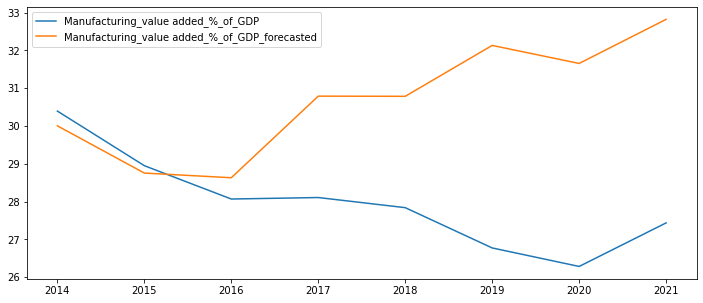

In [68]:
# plot prediction
test_original = df[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [70]:
#calculate RMSE
valid_res = test_original.drop(["Year", "Access_finance"],axis= 1)
for col_name in valid_res.columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name+"_forecasted"], test_original[col_name])))

RMSE value for Employment_in_industry_male is: 33.6655623828622
RMSE value for High_technology_exports is: 12.563721733930496
RMSE value for Research_development_expenditure is: 3.43467070778916
RMSE value for Researchers in R&D is: 2928.5689593838697
RMSE value for Population_labor_rate is: 10.311429698054269
RMSE value for Population_density is: 6.152602522003
RMSE value for Foreign_direct_investment is: 130.93771097852795
RMSE value for Net_trade_in_goods_services is: 1341336615398.396
RMSE value for Air_freight_million_ton_km is: 61284.237238790316
RMSE value for Container_port_traffic_TEU is: 448851753.01679593
RMSE value for Railways_goods_trans_million_ton-km is: 5105045.960395632
RMSE value for Industry_value_added_current_USD is: 9404282860113.74
RMSE value for GDP_per_capita_current_USD is: 15282.645539530376
RMSE value for Final_consumption is: 8290320792823.422
RMSE value for New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS] is: 3.3404104

## China

In [71]:
df_chn = method_dict["NOCB"][0]

### Missing value imputation

In [72]:
for j in df_chn.columns:
  df_chn[j] = df_chn[j].ffill()
df_chn

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,31.709999,14.530659,1.66323,3355.864990,65.075565,1.912448,1.243881,-7.654224e+09,516.500000,3.542802e+06,106195.0,8.961370e+10,10211.837189,1.098986e+11,NaN,9.576173,13.793444
1,1981,31.709999,14.530659,1.66323,3355.864990,65.439798,1.943038,1.326081,-7.654224e+09,556.400024,3.542802e+06,106195.0,8.961370e+10,11854.588495,1.308464e+11,NaN,9.576173,13.793444
2,1982,31.709999,14.530659,1.66323,3355.864990,65.657256,1.975710,1.177881,-7.654224e+09,576.000000,3.542802e+06,106195.0,8.961370e+10,12788.549290,1.435110e+11,NaN,9.576173,13.793444
3,1983,31.709999,14.530659,1.66323,3355.864990,65.790742,2.000573,1.686631,-7.654224e+09,624.900024,3.542802e+06,106195.0,8.961370e+10,11538.398419,1.380477e+11,NaN,9.576173,13.793444
4,1984,31.709999,14.530659,1.66323,3355.864990,65.938446,2.023352,0.221211,-7.654224e+09,734.099976,3.542802e+06,106195.0,8.961370e+10,12454.551717,1.457073e+11,NaN,9.576173,13.793444
5,1985,31.709999,14.530659,1.66323,3355.864990,66.136631,2.051209,1.162198,-7.654224e+09,814.799988,3.542802e+06,106195.0,8.961370e+10,11459.179568,1.341052e+11,NaN,9.576173,13.793444
6,1986,31.709999,14.530659,1.66323,3355.864990,66.214923,2.085105,2.944456,-7.654224e+09,859.299988,3.542802e+06,106195.0,8.961370e+10,11384.938239,1.375874e+11,NaN,9.576173,13.793444
7,1987,31.709999,14.530659,1.66323,3355.864990,66.397148,2.117061,2.740501,-7.654224e+09,990.799988,3.542802e+06,106195.0,8.961370e+10,11645.452594,1.436514e+11,NaN,9.576173,13.793444
8,1988,31.709999,14.530659,1.66323,3355.864990,66.618606,2.151986,3.590682,-7.654224e+09,1027.099976,3.542802e+06,106195.0,8.961370e+10,14279.159439,1.735179e+11,NaN,9.576173,13.793444
9,1989,31.709999,14.530659,1.66323,3355.864990,66.782627,2.188720,2.676461,-7.654224e+09,1125.300049,3.542802e+06,106195.0,8.961370e+10,17828.048233,2.155883e+11,NaN,9.576173,13.793444


### Visualize time series

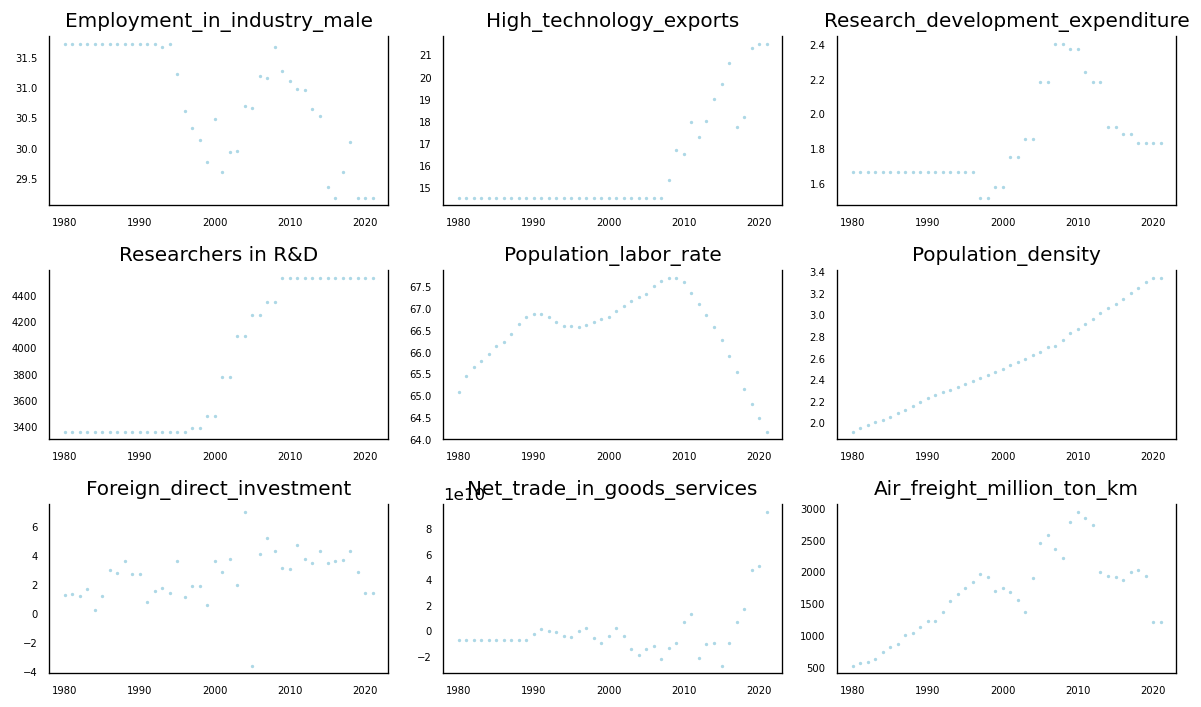

In [73]:
plot_time_series(df_chn,3,3)

### ADF test

In [76]:
df_test = df_chn.drop(["Year", "Access_finance"],axis= 1)
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Employment_in_industry_male" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1115
 No. Lags Chosen       = 8
 Critical value 1%     = -3.646
 Critical value 5%     = -2.954
 Critical value 10%    = -2.616
 => P-Value = 0.7105. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "High_technology_exports" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6795
 No. Lags Chosen       = 9
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.9981. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Research_development_expenditure" 
    -----------------------------------------

### Cointegration Test

In [77]:
col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns


for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))

Employment_in_industry_male: 
  coint_t -1.413006928520418 
  p-value 0.7930200560268628
 true
High_technology_exports: 
  coint_t -1.9632561900247278 
  p-value 0.5476170633893663
 true
Research_development_expenditure: 
  coint_t -1.1991177564299584 
  p-value 0.8581318175946946
 true
Researchers in R&D: 
  coint_t -3.1954945226629468 
  p-value 0.07068450309205711
 true
Population_labor_rate: 
  coint_t -0.6881155905211753 
  p-value 0.9479056867664114
 true
Population_density: 
  coint_t -2.3759539268333625 
  p-value 0.33632669363103657
 true
Foreign_direct_investment: 
  coint_t -0.10598166319596872 
  p-value 0.983110754394352
 true
Net_trade_in_goods_services: 
  coint_t -2.1092770633684883 
  p-value 0.471518708546508
 true
Air_freight_million_ton_km: 
  coint_t -0.22087874433724897 
  p-value 0.9792157413638469
 true
Container_port_traffic_TEU: 
  coint_t -2.3155339855377006 
  p-value 0.3658276109767097
 true
Railways_goods_trans_million_ton-km: 
  coint_t -1.990061379851007

### VAR model fitting

In [81]:
df_test_train = df_test#.drop(["Access_finance"],axis =1)
train_diff2, valid_diff2 = split_train_test(df_test_train, 0.8)

In [82]:
# select the order of model
model = VAR(endog=train_diff2)


In [83]:
res = model.fit(3,trend = "nc")
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Oct, 2022
Time:                     20:30:28
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -180.406
Nobs:                     30.0000    HQIC:                  -204.801
Log likelihood:           3331.06    FPE:               1.06069e-106
AIC:                     -216.276    Det(Omega_mle):    2.43229e-113
--------------------------------------------------------------------
Results for equation Employment_in_industry_male
                                                                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------------------------------------------
L1.Employment_in_industry_male                    

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


### Redisual Checking for correlation

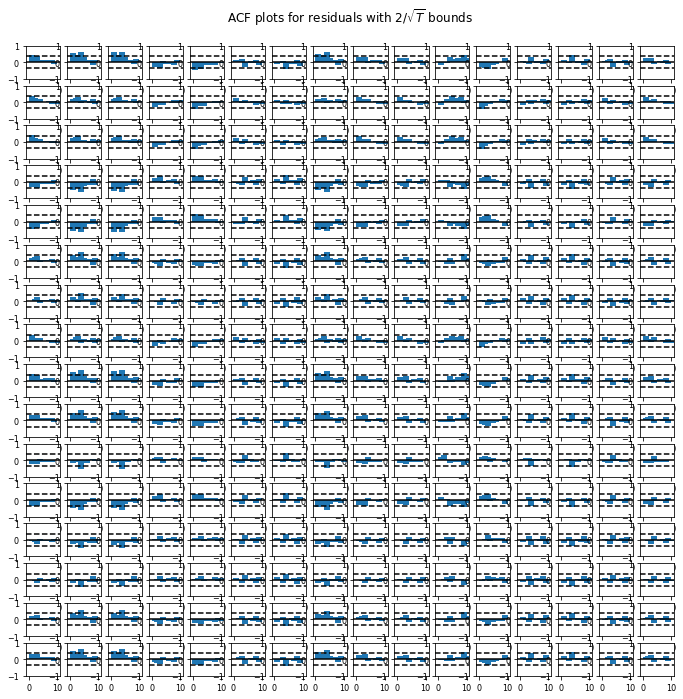

In [84]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction

In [85]:
pred = res.forecast(train_diff2.values, steps=8)
df_forecast = pd.DataFrame(data = pred,columns = train_diff2.columns,index = ['2014','2015','2016','2017','2018','2019','2020','2021'])
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'] = df_forecast['Manufacturing_value added_%_of_GDP']

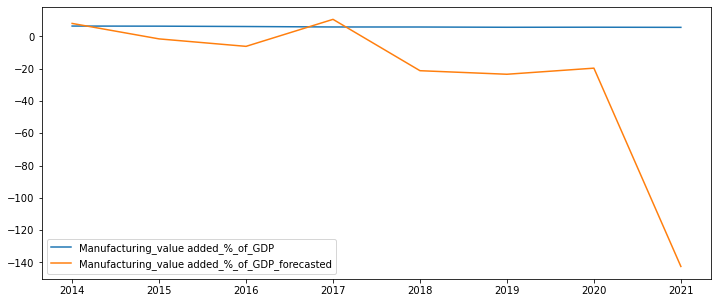

In [86]:
# plot prediction
test_original = df_chn[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [90]:
for col_name in df_forecast.drop(['Manufacturing_value added_%_of_GDP_forecasted'], axis = 1).columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name], test_original[col_name])))

RMSE value for Employment_in_industry_male is: 115.97245228069835
RMSE value for High_technology_exports is: 25.125942756467545
RMSE value for Research_development_expenditure is: 30.106524739091526
RMSE value for Researchers in R&D is: 8719.406127477474
RMSE value for Population_labor_rate is: 99.85161729596473
RMSE value for Population_density is: 5.5181388571652015
RMSE value for Foreign_direct_investment is: 141.04476906115667
RMSE value for Net_trade_in_goods_services is: 1238632748782.799
RMSE value for Air_freight_million_ton_km is: 34995.914356926245
RMSE value for Container_port_traffic_TEU is: 12574569.929372193
RMSE value for Railways_goods_trans_million_ton-km is: 1473974.6776132495
RMSE value for Industry_value_added_current_USD is: 4922238157412.52
RMSE value for GDP_per_capita_current_USD is: 410623.9755188761
RMSE value for Final_consumption is: 8682823613745.885
RMSE value for New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS] is: 16.

## United States

Time range: 1980 - 2021
Since Access_finance and New_business_density are not reported in US data, we will discard these two variables.

In [91]:
df_us = method_dict["NOCB"][7]

In [93]:
df_us = df_us.drop(['Access_finance'], axis = 1)
df_us

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,36.560001,48.482453,1.31991,2503.444824,68.233329,3602.902985,10.387728,-1.026990e+09,544.099976,17100000.0,NaN,4.149453e+09,4928.139118,7.155339e+09,5.848007,26.526116
1,1981,36.560001,48.482453,1.31991,2503.444824,69.023572,3780.350746,11.710342,-7.649010e+08,645.200012,17100000.0,NaN,4.880534e+09,5596.585977,8.124089e+09,5.848007,25.758105
2,1982,36.560001,48.482453,1.31991,2503.444824,69.513996,3949.949254,9.959123,-6.654128e+08,736.799988,17100000.0,NaN,5.361765e+09,6077.634241,9.082028e+09,5.848007,22.292915
3,1983,36.560001,48.482453,1.31991,2503.444824,69.807029,4001.583582,6.375949,-3.057192e+08,846.000000,17100000.0,NaN,6.123598e+09,6633.236674,9.679907e+09,5.848007,21.464344
4,1984,36.560001,48.482453,1.31991,2503.444824,70.085086,4077.941791,6.591967,-5.133414e+08,961.200012,17100000.0,NaN,6.943540e+09,7228.317584,1.069394e+10,5.848007,21.402383
5,1985,36.560001,48.482453,1.31991,2503.444824,70.444836,4083.517910,5.464177,-3.845192e+08,981.000000,17100000.0,NaN,6.163283e+09,7001.766748,1.113881e+10,5.848007,20.115362
6,1986,36.560001,48.482453,1.31991,2503.444824,70.880903,4079.661194,9.201630,5.832600e+07,1111.800049,17100000.0,NaN,6.157538e+09,6799.930363,1.101318e+10,5.848007,22.613816
7,1987,36.560001,48.482453,1.31991,2503.444824,71.459948,4141.476119,13.557893,3.950649e+07,1256.800049,17100000.0,NaN,6.823321e+09,7539.029302,1.226770e+10,5.848007,24.090056
8,1988,36.560001,48.482453,1.31991,2503.444824,72.076556,4247.922388,14.405140,1.793508e+09,1398.300049,17100000.0,NaN,8.520275e+09,8914.441226,1.428889e+10,5.848007,26.078421
9,1989,36.560001,48.482453,1.31991,2503.444824,72.592804,4374.479104,9.474996,2.496592e+09,1640.099976,17100000.0,NaN,9.785281e+09,10394.538996,1.692651e+10,5.848007,25.301223


### Missing value imputation


In [94]:
for j in df_us.columns:
  df_us[j] = df_us[j].ffill()
df_us

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
0,1980,36.560001,48.482453,1.31991,2503.444824,68.233329,3602.902985,10.387728,-1.026990e+09,544.099976,17100000.0,NaN,4.149453e+09,4928.139118,7.155339e+09,5.848007,26.526116
1,1981,36.560001,48.482453,1.31991,2503.444824,69.023572,3780.350746,11.710342,-7.649010e+08,645.200012,17100000.0,NaN,4.880534e+09,5596.585977,8.124089e+09,5.848007,25.758105
2,1982,36.560001,48.482453,1.31991,2503.444824,69.513996,3949.949254,9.959123,-6.654128e+08,736.799988,17100000.0,NaN,5.361765e+09,6077.634241,9.082028e+09,5.848007,22.292915
3,1983,36.560001,48.482453,1.31991,2503.444824,69.807029,4001.583582,6.375949,-3.057192e+08,846.000000,17100000.0,NaN,6.123598e+09,6633.236674,9.679907e+09,5.848007,21.464344
4,1984,36.560001,48.482453,1.31991,2503.444824,70.085086,4077.941791,6.591967,-5.133414e+08,961.200012,17100000.0,NaN,6.943540e+09,7228.317584,1.069394e+10,5.848007,21.402383
5,1985,36.560001,48.482453,1.31991,2503.444824,70.444836,4083.517910,5.464177,-3.845192e+08,981.000000,17100000.0,NaN,6.163283e+09,7001.766748,1.113881e+10,5.848007,20.115362
6,1986,36.560001,48.482453,1.31991,2503.444824,70.880903,4079.661194,9.201630,5.832600e+07,1111.800049,17100000.0,NaN,6.157538e+09,6799.930363,1.101318e+10,5.848007,22.613816
7,1987,36.560001,48.482453,1.31991,2503.444824,71.459948,4141.476119,13.557893,3.950649e+07,1256.800049,17100000.0,NaN,6.823321e+09,7539.029302,1.226770e+10,5.848007,24.090056
8,1988,36.560001,48.482453,1.31991,2503.444824,72.076556,4247.922388,14.405140,1.793508e+09,1398.300049,17100000.0,NaN,8.520275e+09,8914.441226,1.428889e+10,5.848007,26.078421
9,1989,36.560001,48.482453,1.31991,2503.444824,72.592804,4374.479104,9.474996,2.496592e+09,1640.099976,17100000.0,NaN,9.785281e+09,10394.538996,1.692651e+10,5.848007,25.301223


### Visualize time series

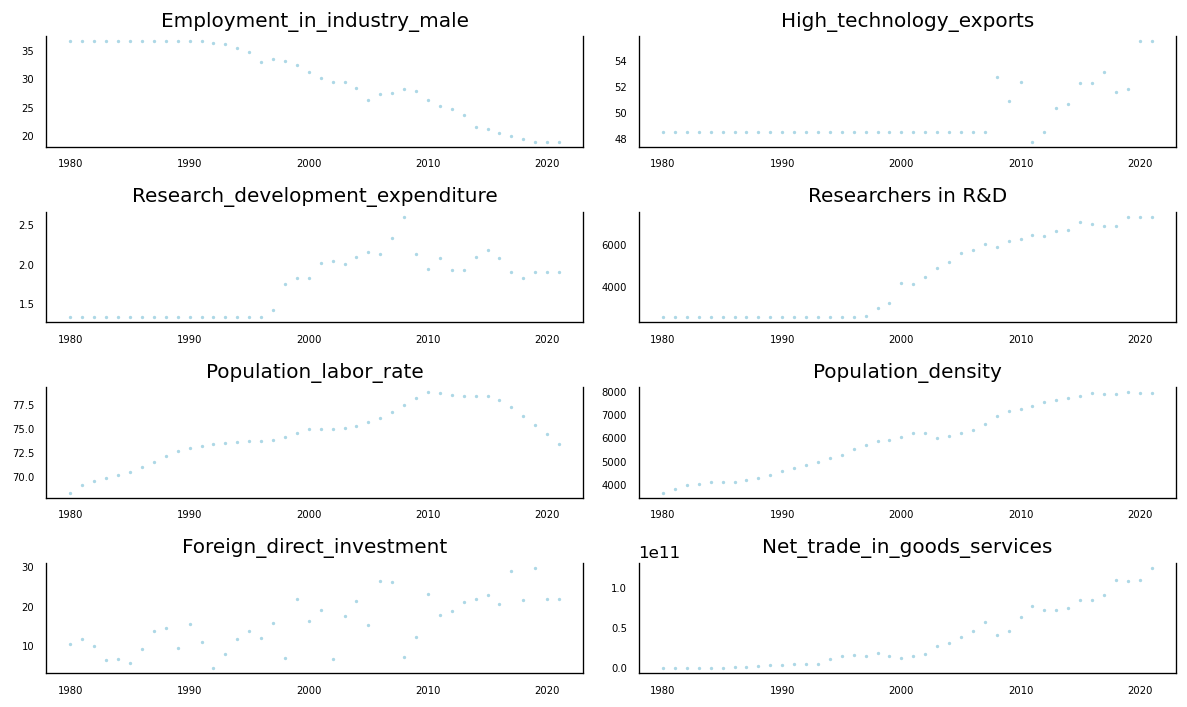

In [95]:
plot_time_series(df_us,4,2)

### ADF test

In [104]:
df_test = df_us.drop(["Year", "Railways_goods_trans_million_ton-km"],axis= 1)
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Employment_in_industry_male" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1713
 No. Lags Chosen       = 0
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.9958. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "High_technology_exports" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.7532
 No. Lags Chosen       = 6
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 1.0. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Research_development_expenditure" 
    ---------------------------------------------

In [105]:
df_diff = df_test.diff().dropna()
# df_diff
# df_diff_2 = df_diff.diff().dropna()
# # df_diff_2

In [106]:
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Employment_in_industry_male" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9415
 No. Lags Chosen       = 0
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High_technology_exports" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2369
 No. Lags Chosen       = 3
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Research_development_expenditure" 
    -----------------------------------------------
 Null Hypothesi

### Cointegration Test

In [107]:
col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns

for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))

Employment_in_industry_male: 
  coint_t -2.3668488242479926 
  p-value 0.3407125004005739
 true
High_technology_exports: 
  coint_t -3.125520172427578 
  p-value 0.08329124889372097
 true
Research_development_expenditure: 
  coint_t -1.949179831895971 
  p-value 0.5548725784686891
 true
Researchers in R&D: 
  coint_t -2.3703395481477996 
  p-value 0.33902841086657876
 true
Population_labor_rate: 
  coint_t -1.9149429677432317 
  p-value 0.5724091223449612
 true
Population_density: 
  coint_t -2.177326198593426 
  p-value 0.4360848583775259
 true
Foreign_direct_investment: 
  coint_t -2.4378560688673567 
  p-value 0.30714143669723365
 true
Net_trade_in_goods_services: 
  coint_t -2.4764885509167383 
  p-value 0.2895355706727729
 true
Air_freight_million_ton_km: 
  coint_t -1.958766417628502 
  p-value 0.5499338520841272
 true
Container_port_traffic_TEU: 
  coint_t -2.708423156304453 
  p-value 0.19656383800220023
 true
Industry_value_added_current_USD: 
  coint_t -2.553508727468532 
  p

### VAR model fitting

In [108]:
train_diff, valid_diff = split_train_test(df_diff, 0.8)
# select the order of model
model = VAR(endog=train_diff)
lag_order = model.select_order()
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       192.2       192.9   2.974e+83       192.4
1      159.5*      170.6*  9.472e+69*      163.1*
-------------------------------------------------


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# fit model
res = model.fit(2)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Oct, 2022
Time:                     01:41:51
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    157.517
Nobs:                     30.0000    HQIC:                   153.197
Log likelihood:          -2472.02    FPE:                1.50569e+66
AIC:                      151.165    Det(Omega_mle):     4.14880e+64
--------------------------------------------------------------------
Results for equation Logistic_performance
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                         -0.015071         0.007095           -2.124           0.034
L1.Logistic_performance                        0.57

### Residual Checking for correlation

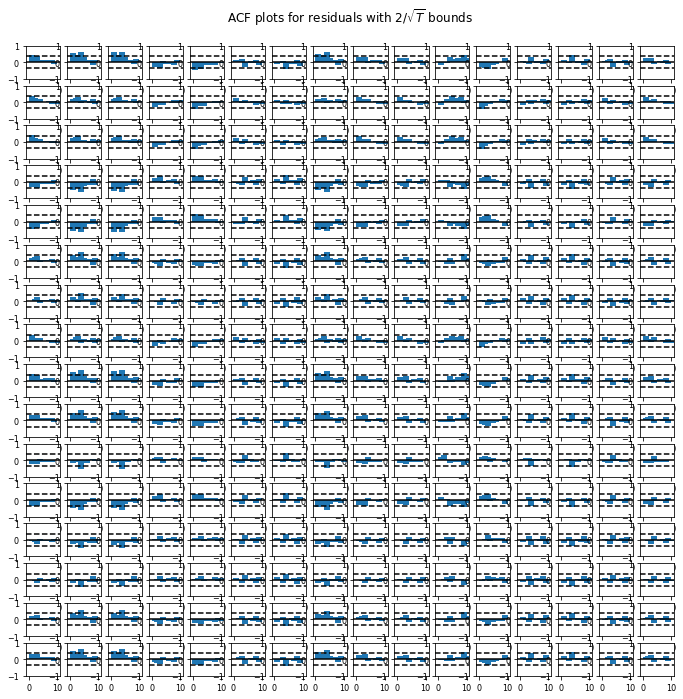

In [109]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction

In [110]:
pred = res.forecast(train_diff.values, steps=8)
df_forecast = pd.DataFrame(data = pred,columns = train_diff.columns,index = ['2014','2015','2016','2017','2018','2019','2020','2021'])
df_forecast

ValueError: shapes (16,16) and (15,) not aligned: 16 (dim 1) != 15 (dim 0)

In [111]:
#invert result
test_obs = 8
def invert_first_diff(col_name, test_obs):
  df_forecast[col_name+"_forecasted"] = df_us[col_name].iloc[-test_obs-1] + df_forecast[col_name].cumsum()


In [112]:
for col_name in df_forecast.columns :
  invert_first_diff(col_name, test_obs)
df_forecast

KeyError: 'Manufacturing_value added_%_of_GDP_forecasted'

In [ ]:
# plot prediction
test_original = df_us[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [113]:
test_original

,Year,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Manufacturing_value added_%_of_GDP
2014,2014,30.530001,18.982775,1.92083,4532.401367,66.551444,3.055815,4.306816,-9.902002e+09,1925.772009,7401051.0,367700.0,3.753851e+11,62511.690590,1.079254e+12,NaN,14.228266,6.368635
2015,2015,29.340000,19.685315,1.92083,4532.401367,66.258049,3.100113,3.472168,-2.777487e+10,1907.051909,7621017.0,401600.0,3.200141e+11,56707.022077,1.015654e+12,NaN,15.273941,6.299997
2016,2016,29.170000,20.609814,1.87926,4532.401367,65.906573,3.144936,3.560954,-1.038813e+10,1868.732628,7629490.0,413490.0,2.694228e+11,49881.763714,9.275127e+11,NaN,15.248004,6.085499
2017,2017,29.600000,17.701982,1.87926,4532.401367,65.530942,3.198361,3.632469,6.854596e+09,1982.586171,7995040.0,413490.0,3.113817e+11,53934.250175,1.000314e+12,NaN,15.447873,5.798737
2018,2018,30.090000,18.176921,1.82928,4532.401367,65.152908,3.247871,4.292849,1.672038e+10,2027.637110,8569337.0,413490.0,3.448461e+11,57180.779400,1.072642e+12,NaN,14.479619,5.777272
2019,2019,29.170000,21.311031,1.82928,4532.401367,64.803352,3.297670,2.809090,4.698086e+10,1931.155530,8798571.0,413490.0,3.525533e+11,54875.285956,1.033084e+12,NaN,13.589913,5.615118
2020,2020,29.170000,21.487221,1.82928,4532.401367,64.494517,3.340250,1.408358,5.067132e+10,1200.644145,8656995.0,413490.0,3.380949e+11,51680.316523,9.799812e+11,NaN,14.272398,5.651114
2021,2021,29.170000,21.487221,1.82928,4532.401367,64.174259,3.340250,1.408358,9.306218e+10,1200.644145,8656995.0,413490.0,3.933099e+11,59934.129409,1.127328e+12,NaN,14.272398,5.565624


In [114]:
#calculate RMSE
valid_res = test_original.drop(["Year", "Logistic_performance", "Access_finance", "New_business_density"],axis= 1)
for col_name in valid_res.columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name+"_forecasted"], test_original[col_name])))

KeyError: "['Logistic_performance', 'New_business_density'] not found in axis"